In [1]:
# 1. magic to print version
# 2. magic so that the notebook will reload external python modules
# https://gist.github.com/minrk/3301035
%load_ext watermark
%load_ext autoreload
%autoreload 
from typing import List
%watermark -a 'Jae H. Choi' -d -t -v -p typing

Jae H. Choi 2020-12-23 11:12:48 

CPython 3.8.3
IPython 7.16.1

typing unknown


## Intro to Boosting

Boosting was born out of [the question:](http://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf) is it possible to get one strong model from a large amount of relatively weak and simple models?   
By saying "weak models", we do not mean simple basic models like decision trees but models with poor accuracy performance, where poor is a little bit better than random.

[A positive mathematical answer](http://www.cs.princeton.edu/~schapire/papers/strengthofweak.pdf) to this question was identified, but it took a few years to develop fully functioning algorithms based on this solution e.g. AdaBoost. These algoritms take a greedy approach: first, they build a linear combination of simple models (basic algorithms) by re-weighing the input data. Then, the model (usually a decision tree) is built on earlier incorrectly predicted objects, which are now given larger weights.  

<spoiler title="More about AdaBoost">
Many machine learning courses study AdaBoost - the ancestor of GBM (Gradient Boosting Machine). However, since AdaBoost merged with GBM, it has become apparent that AdaBoost is just a particular variation of GBM.  

The algorithm itself has a very clear visual interpretation and intuition for defining weights. Let's have a look at the following toy classification problem where we are going to split the data between the trees of depth 1 (also known as 'stumps') on each iteration of AdaBoost. For the first two iterations, we have the following picture:

<img src='https://habrastorage.org/web/d28/78f/7ba/d2878f7bad0340fc8002e5ba6d0879a5.jpg' width=30%>

The size of point corresponds to its weight, which was assigned for an incorrect prediction.  On each iteration, we can see that these weights are growing -- the stumps cannot cope with this problem. Although, if we take a weighted vote for the stumps, we will get the correct classifications:

<img src='https://habrastorage.org/web/b2b/029/d89/b2b029d898f64bbbb158e15d29595969.png' width=30%>

Pseudocode:
- Initialize sample weights 
$$w_i^{(0)} = \frac{1}{I}, i = 1, \dots, I$$.
- For all $t = 1, \dots, T$
    * Train base algo $b_t$, let $\epsilon_t$ be it's training error.
    * $$ \alpha_t = \frac{1}{2}ln(\frac{1 - \epsilon_t}{\epsilon_t})$$.
    * Update sample weights: $$ w_i^{(t)} = w_i^{(t-1)} e^{-\alpha_t y_i b_t(x_i)}, i = 1, \dots, l$$.
    * Normalize sample weights: $$ w_0^{(t)} = \sum_{j = 1}^k w_j^{(t)}, w_i^{(t)} = \frac{w_i^{(t)}}{w_0^{(t)}}, i = 1, \dots, I$$.
- Return $$\sum_t^{T}\alpha_tb_t$$


[Here](https://www.youtube.com/watch?v=k4G2VCuOMMg) is more detailed example of AdaBoost where, as we iterate, we can see the weights increase, especially on the border between classes.

AdaBoost works well, but [the lack](https://www.cs.princeton.edu/courses/archive/spring07/cos424/papers/boosting-survey.pdf) of explanation for why the algorithm is successful sewed the seeds of doubt. Some considered it a super-algorithm, a silver bullet, but others were skeptical and believed AdaBoost was just overfitting. 

The overfitting problem did indeed exist, especially when data had strong outliers. Therefore, in those types of problems, AdaBoost was unstable. Fortunately, a few professors in the statistics department at Stanford, who had created Lasso, Elastic Net, and Random Forest, started researching the algorithm. In 1999, Jerome Friedman came up with the generalization of boosting algorithms development - Gradient Boosting (Machine), also known as GBM. With this work, Friedman set up the statistical foundation for many algorithms providing the general approach of boosting for optimization in the functional space.

CART, bootstrap, and many other algorithms have originated from Stanford's statistics department. In doing so, the department has solidified their names in future textbooks. These algorithms are very practical, and some recent works have yet to be widely adopted. For example, check out [glinternet](https://arxiv.org/abs/1308.2719).  

Not many video recordings of Friedman are available. Although, there is a very interesting [interview](https://www.youtube.com/watch?v=8hupHmBVvb0) with him about the creation of CART and how they solved statistics problems (which is similar to data analysis and data science today) more than 40 years ago.

There is also a great [lecture](https://www.youtube.com/watch?v=zBk3PK3g-Fc) from Hastie, a retrospective on data analysis from one of the creators of methods that we use everyday.

In general, there has been a transition from engineering and algorithmic research to a full-fledged approach to building and studying algorithms. From a mathematical perspective, this is not a big change - we are still adding (or boosting) weak algorithms and enlarging our ensemble with gradual improvements for parts of the data where the model was inaccurate. But, this time, the next simple model is not just built on re-weighted objects but improves its approximation of the gradient of overall objective function. This concept greatly opens up our algorithms for imagination and extensions.

<img src="https://habrastorage.org/webt/h2/v4/k9/h2v4k9r-4yn4jwvwz99fbss4ghi.png" width=45%/>

## History of GBM

It took more than 10 years after the introduction of GBM for it to become an essential part of the data science toolbox.   
GBM was extended to apply to different statistics problems: GLMboost and GAMboost for strengthening already existing GAM models, CoxBoost for survival curves, and RankBoost and LambdaMART for ranking.   
Many realizations of GBM also appeared under different names and on different platforms: Stochastic GBM, GBDT (Gradient Boosted Decision Trees), GBRT (Gradient Boosted Regression Trees), MART (Multiple Additive Regression Trees), and more. In addition, the ML community was very segmented and dissociated, which made it hard to track just how widespread boosting had become.  

At the same time, boosting had been actively used in search ranking. This problem was rewritten in terms of a loss function that penalizes errors in the output order, so it became convenient to simply insert it into GBM. AltaVista was one of the first companies who introduced boosting to ranking. Soon, the ideas spread to Yahoo, Yandex, Bing, etc. Once this happened, boosting became one of the main algorithms that was used not only in research but also in core technologies in industry.

<img src='https://habrastorage.org/web/48a/ea4/fff/48aea4fffdbe4e5f9205ba81110e6061.jpg' align='right' width=30%> ML competitions, especially Kaggle, played a major role in boosting's popularization. Now, researchers had a common platform where they could compete in different data science problems with large number of participants from around the world. With Kaggle, one could test new algorithms on the real data, giving algoritms oppurtunity to "shine", and provide full information in sharing model performance results across competition data sets. This is exactly what happened to boosting when it was used at [Kaggle](http://blog.kaggle.com/2011/12/21/score-xavier-conort-on-coming-second-in-give-me-some-credit/) (check interviews with Kaggle winners starting from 2011 who mostly used boosting). The [XGBoost](https://github.com/dmlc/xgboost) library quickly gained popularity after its appearance. XGBoost is not a new, unique algorithm; it is just an extremely effective realization of classic GBM with additional heuristics.

This algorithm has gone through very typical path for ML algorithms today: mathematical problem and algorithmic crafts to successful practical applications and mass adoption years after its first appearance.

## 2. GBM algorithm
### ML problem statement

We are going to solve the problem of function approximation in a general supervised learning setting. We have a set of features $ x $ and target variables $ y, \left\{ (x_i, y_i) \right\}_{i=1, \ldots,n}$ which we use to restore the dependence $ y = f(x) $. We restore the dependence by approximating $ \hat{f}(x) $ and by understanding which approximation is better when we use the loss function $ L(y,f) $, which we want to minimize: $ y \approx \hat{f}(x), \hat{f}(x) = \underset{f(x)}{\arg\min} \ L(y,f(x)) $  

<img src='https://habrastorage.org/webt/le/3a/nt/le3antzue1kp18mxyxttxrsl3wg.png'  align='center' width=70%>

At this moment, we do not make any assumptions regarding the type of dependence $ f(x) $, the model of our approximation $ \hat{f}(x) $, or the distribution of the target variable ($ y $). We only expect that the function $ L(y,f) $ is differentiable. Our formula is very general; let's define it for a particular data set with a population mean $ \hat {f}(x) $. Our expression for minimizing the loss of the data is the following:  
$$  \hat{f}(x) = \underset{f(x)}{\arg\min} \ \mathbb {E} _{x,y}[L(y,f(x))]  $$

Unfortunately, the number of functions $ f(x) $ is not just large, but its functional space is infinite-dimensional. That is why it is acceptable for us to limit the search space by some family of functions $ f(x, \theta), \theta \in \mathbb{R}^d $. This simplifies the objective a lot because now we have a solvable optimization of parameter values:
$$ \hat{f}(x) = f(x, \hat{\theta}), \\
 \hat{\theta} = \underset{\theta}{\arg\min} \ \mathbb {E} _{x,y}[L(y,f(x,\theta))] $$

Simple analytical solutions for finding the optimal parameters $ \hat{\theta} $ often do not exist, so the parameters are usually approximated iteratively. To start, we write down the empirical loss function $ L_{\theta}(\hat{\theta}) $ that will allow us to evaluate our parameters using our data. Additionally, let's write out our approximation $ \hat{\theta} $ for a number of $ M $ iterations as a sum:  
$$ \hat{\theta} = \sum_{i = 1}^M \hat{\theta_i}, \\
L_{\theta}(\hat{\theta}) =  \sum_{i = 1}^N L(y_i,f(x_i, \hat{\theta}))$$

Then, the only thing left is to find a suitable, iterative algorithm to minimize $ L_{\theta}(\hat{\theta})$. Gradient descent is the simplest and most frequently used option. We define the gradient as $ \nabla L_{\theta}(\hat{\theta})$ and add our iterative evaluations $ \hat{\theta_i}$ to it (since we are minimizing the loss, we add the minus sign). Our last step is to initialize our first approximation $ \hat{\theta_0}$ and choose the number of iterations $ M$. Let's review the steps for this inefficient and naive algorithm for approximating $ \hat{\theta}$:

1. Define the initial approximation of the parameters $ \hat{\theta} = \hat{\theta_0}$
2. For every iteration $ t = 1, \dots, M$ repeat steps 3-7:
3. Calculate the gradient of the loss function $ \nabla L_{\theta}(\hat{\theta})$ for the current approximation $ \hat{\theta}$
$ \nabla L_{\theta}(\hat{\theta}) = \left[\frac{\partial L(y, f(x, \theta))}{\partial \theta}\right]_{\theta = \hat{\theta}}$
4. Set the current iterative approximation $ \hat{\theta_t}$ based on the calculated gradient
$ \hat{\theta_t} \leftarrow −\nabla L_{\theta}(\hat{\theta})$
5. Update the approximation of the parameters $ \hat{\theta}$:
$ \hat{\theta} \leftarrow \hat{\theta} + \hat{\theta_t} = \sum_{i = 0}^t \hat{\theta_i} $
6. Save the result of approximation $ \hat{\theta}$
$ \hat{\theta} = \sum_{i = 0}^M \hat{\theta_i} $
7. Use the function that was found $ \hat{f}(x) = f(x, \hat{\theta})$

<img src='https://habrastorage.org/web/2b5/5d6/90d/2b55d690d99e4ec0976b360aae6ce4df.jpg' align='center' width=50%>


### Functional gradient descent

Let's imagine for a second that we can perform optimization in the function space and iteratively search for the approximations $ \hat{f}(x)$ as functions themselves. We will express our approximation as a sum of incremental improvements, each being a function. For convenience, we will immediately start with the sum from the initial approximation $ \hat{f_0}(x)$:
$$ \hat{f}(x) = \sum_{i = 0}^M \hat{f_i}(x)$$

Nothing has happened yet; we have only decided that we will search for our approximation $ \hat{f}(x)$ not as a big model with plenty of parameters (as an example, neural network), but as a sum of functions, pretending we move in functional space.

In order to accomplish this task, we need to limit our search by some function family $ \hat{f}(x) = h(x, \theta)$. There are a few issues here -- first of all, the sum of models can be more complicated than any model from this family; secondly, the general objective is still in functional space. Let's note that, on every step, we will need to select an optimal coefficient $ \rho \in \mathbb{R}$. For step $\large t$, the problem is the following:
$$ \hat{f}(x) = \sum_{i = 0}^{t-1} \hat{f_i}(x), \\
 (\rho_t,\theta_t) = \underset{\rho,\theta}{\arg\min} \ \mathbb {E} _{x,y}[L(y,\hat{f}(x) +  \rho \cdot h(x, \theta))], \\
 \hat{f_t}(x) = \rho_t \cdot h(x, \theta_t)$$

Here is where the magic happens. We have defined all of our objectives in general terms, as if we could have trained any kind of model $ h(x, \theta)$ for any type of loss functions $ L(y, f(x, \theta))$. In practice, this is extremely difficult, but, fortunately, there is a simple way to solve this task.

Knowing the expression of loss function's gradient, we can calculate its value on our data. So, let's train the models such that our predictions will be more correlated with this gradient (with a minus sign). In other words, we will use least squares to correct the predictions with these residuals. For classification, regression, and ranking tasks, we will minimize the squared difference between pseudo-residuals $ r$ and our predictions. For step $ t$, the final problem looks like the following:
$$ \hat{f}(x) = \sum_{i = 0}^{t-1} \hat{f_i}(x), \\
 r_{it} = -\left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x)=\hat{f}(x)}, \quad \mbox{for } i=1,\ldots,n ,\\
 \theta_t = \underset{\theta}{\arg\min} \ \sum_{i = 1}^{n} (r_{it} - h(x_i, \theta))^2, \\
 \rho_t = \underset{\rho}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \hat{f}(x_i) + \rho \cdot h(x_i, \theta_t))$$


### Friedman's classic GBM algorithm

We can now define the classic GBM algorithm suggested by Jerome Friedman in 1999. It is a supervised algorithm that has the following components:

- dataset $\large \left\{ (x_i, y_i) \right\}_{i=1, \ldots,n}$;
- number of iterations $\large M$;
- choice of loss function $\large L(y, f)$ with a defined gradient;
- choice of function family of base algorithms $\large h(x, \theta)$ with the training procedure;
- additional hyperparameters $\large h(x, \theta)$ (for example, in decision trees, the tree depth);

The only thing left is the initial approximation $\large f_0(x)$. For simplicity, for an initial approximation, a constant value $\large \gamma$ is used. The constant value, as well as the optimal coefficient $\large \rho $, are identified via binary search or another line search algorithm over the initial loss function (not a gradient). So, we have our GBM algorithm described as follows:

1. Initialize GBM with constant value $\large \hat{f}(x) = \hat{f}_0, \hat{f}_0 = \gamma,  \gamma \in \mathbb{R}$
$\large \hat{f}_0 = \underset{\gamma}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \gamma)$
2. For each iteration $\large t = 1, \dots, M$, repeat:
1. Calculate pseudo-residuals $\large r_t$:
$\large r_{it} = -\left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x)=\hat{f}(x)}, \quad \mbox{for } i=1,\ldots,n$
2. Build new base algorithm $\large h_t(x)$ as regression on pseudo-residuals $\large \left\{ (x_i, r_{it}) \right\}_{i=1, \ldots,n}$
3. Find optimal coefficient $\large \rho_t $ at $\large h_t(x)$ regarding initial loss function
$\large \rho_t = \underset{\rho}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \hat{f}(x_i) +  \rho \cdot h(x_i, \theta))$
4. Save $\large \hat{f_t}(x) = \rho_t \cdot h_t(x)$
5. Update current approximation $\large \hat{f}(x)$
$\large \hat{f}(x) \leftarrow \hat{f}(x) + \hat{f_t}(x) = \sum_{i = 0}^{t} \hat{f_i}(x)$
3. Compose final GBM model $\large \hat{f}(x)$
$\large \hat{f}(x) = \sum_{i = 0}^M \hat{f_i}(x) $
4. Conquer Kaggle and the rest of the world

### Step-By-Step example: How GBM Works

Let's see an example of how GBM works. In this toy example, we will restore a noisy function $\large y = cos(x) + \epsilon, \epsilon \sim \mathcal{N}(0, \frac{1}{5}), x \in [-5,5]$.

<img src='https://habrastorage.org/web/9fe/04d/7ba/9fe04d7ba5a645d49fc6aa3e875c8c41.jpg'   align='center' width=50%>

This is a regression problem with a real-valued target, so we will choose to use the mean squared error loss function. We will generate 300 pairs of observations and approximate them with decision trees of depth 2. Let's put together everything we need to use GBM:
- Toy data $\large \left\{ (x_i, y_i) \right\}_{i=1, \ldots,300}$ ✓
- Number of iterations $\large M = 3$ ✓;
- The mean squared error loss function $\large L(y, f) = (y-f)^2$ ✓
- Gradient of $\large L(y, f) = L_2$ loss is just residuals $\large r = (y - f)$ ✓;
- Decision trees as base algorithms $\large h(x)$ ✓;
- Hyperparameters of the decision trees: trees depth is equal to 2 ✓;

For the mean squared error, both initialization $\large \gamma$ and coefficients $\large \rho_t$ are simple. We will initialize GBM with the average value $\large \gamma = \frac{1}{n} \cdot \sum_{i = 1}^n y_i$, and set all coefficients $\large \rho_t$ to 1.

We will run GBM and draw two types of graphs: the current approximation $\large \hat{f}(x)$ (blue graph) and every tree $\large \hat{f_t}(x)$ built on its pseudo-residuals (green graph). The graph's number corresponds to the iteration number:

<img src='https://habrastorage.org/web/edb/328/98a/edb32898ad014d8d95782759d11f63fb.png'   align='center' width=50%>

By the second iteration, our trees have recovered the basic form of the function. However, at the first iteration, we see that the algorithm has built only the "left branch" of the function ($\large x \in [-5, -4]$). This was due to the fact that our trees simply did not have enough depth to build a symmetrical branch at once, and it focused on the left branch with the larger error. Therefore, the right branch appeared only after the second iteration.

The rest of the process goes as expected -- on every step, our pseudo-residuals decreased, and GBM approximated the original function better and better with each iteration. However, by construction, trees cannot approximate a continuous function, which means that GBM is not ideal in this example. To play with GBM function approximations, you can use the awesome interactive demo in this blog called [Brilliantly wrong](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html):

<img src='https://habrastorage.org/web/779/3e0/e66/7793e0e66b7d4871b6391a94cd5d4cf2.jpg'   align='center' width=50%>

## 3. Loss functions

If we want to solve a classification problem instead of regression, what would change? We only need to choose a suitable loss function $\large L(y, f)$. This is the most important, high-level moment that determines exactly how we will optimize and what characteristics we can expect in the final model.

As a rule, we do not need to invent this ourselves – researchers have already done it for us. Today, we will explore loss functions for the two most common objectives: regression $\large y \in \mathbb{R}$ and binary classification $\large y \in \left\{-1, 1\right\}$. 

### Regression loss functions

Let's start with a regression problem for $\large y \in \mathbb{R}$. In order to choose the appropriate loss function, we need to consider which of the properties of the conditional distribution $\large (y|x)$ we want to restore. The most common options are:

- $\large L(y, f) = (y - f)^2$ a.k.a. $\large L_2$ loss or Gaussian loss. It is the classical conditional mean, which is the simplest and most common case. If we do not have any additional information or requirements for a model to be robust, we can use the Gaussian loss.
- $\large L(y, f) = |y - f|$ a.k.a. $\large L_1$ loss or Laplacian loss. At the first glance, this function does not seem to be differentiable, but it actually defines the conditional median. Median, as we know, is robust to outliers, which is why this loss function is better in some cases. The penalty for big variations is not as heavy as it is in $\large L_2$.
- $ \large \begin{equation}  L(y, f) =\left\{   \begin{array}{@{}ll@{}}     (1 - \alpha) \cdot |y - f|, & \text{if}\ y-f \leq 0 \\     \alpha \cdot |y - f|, & \text{if}\ y-f >0  \end{array}\right. \end{equation}, \alpha \in (0,1)
$ a.k.a. $\large L_q$ loss or Quantile loss.  Instead of median, it uses quantiles. For example, $\large \alpha = 0.75$ corresponds to the 75%-quantile. We can see that this function is asymmetric and penalizes the observations which are on the right side of the defined quantile.

<img src='https://habrastorage.org/web/6d5/e3a/09c/6d5e3a09c703491b947fde851e412ac0.png' width=50%>

Let's use loss function $\large L_q$ on our data. The goal is to restore the conditional 75%-quantile of cosine. Let us put everyting together for GBM:
- Toy data $\large \left\{ (x_i, y_i) \right\}_{i=1, \ldots,300}$ ✓
- A number of iterations $\large M = 3$ ✓;
- Loss function for quantiles $ \large \begin{equation}   L_{0.75}(y, f) =\left\{
\begin{array}{@{}ll@{}}    0.25 \cdot |y - f|, & \text{if}\ y-f \leq 0 \\     0.75 \cdot |y - f|, & \text{if}\ y-f >0   \end{array}\right. \end{equation} $ ✓;
- Gradient $\large L_{0.75}(y, f)$ - function weighted by $\large \alpha = 0.75$. We are going to train tree-based model for classification:
$\large r_{i} = -\left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x)=\hat{f}(x)} = $
$\large = \alpha I(y_i > \hat{f}(x_i) ) - (1 - \alpha)I(y_i \leq \hat{f}(x_i) ), \quad \mbox{for } i=1,\ldots,300$ ✓;
- Decision tree as a basic algorithm $\large h(x)$ ✓;
- Hyperparameter of trees: depth =  2 ✓;

For our initial approximation, we will take the needed quantile of $\large y$. However, we do not know anything about optimal coefficients $\large \rho_t$, so we'll use standard line search. The results are the following:

<img src='https://habrastorage.org/web/0e6/7dd/614/0e67dd614076499e91c8c4238457ae4d.png'   align='center'>

We can observe that, on each iteration, $\large r_{i} $ take only 2 possible values, but GBM is still able to restore our initial function.

The overall results of GBM with quantile loss function are the same as the results with quadratic loss function offset by $\large \approx 0.135$. But if we were to use the 90%-quantile, we would not have enough data due to the fact that classes would become unbalanced. We need to remember this when we deal with non-standard problems.

<spoiler title="A few words regarding the regression loss functions">
For regression tasks, many loss functions have been developed, some of them with extra properties. For example, they can be robust like in the [Huber loss function](https://en.wikipedia.org/wiki/Huber_loss). For a small number of outliers, the loss function works as $\large L_2$, but after a defined threshold, the function changes to $\large L_1$. This allows for decreasing the effect of outliers and focusing on the overall picture.

We can illustrate this with the following example. Data is generated from the function  $\large y = \frac{sin(x)}{x}$ with added noise, a mixture from normal and Bernulli distributions. We show the functions on graphs A-D and the relevant GBM on F-H (graph E represents the initial function):

<img src='https://habrastorage.org/web/130/05b/222/13005b222e8a4eb68c3936216c05e276.jpg'   align='center'> [Original size](https://habrastorage.org/web/130/05b/222/13005b222e8a4eb68c3936216c05e276.jpg).


In this example, we used splines as the base algorithm. See, it does not always have to be trees for boosting?

We can clearly see the difference between the functions $\large L_2$, $\large L_1$, and Huber loss. If we choose optimal parameters for the Huber loss, we can get the best possible approximation among all our options. The difference can be seen as well in the 10%, 50%, and 90%-quantiles.

Unfortunately, Huber loss function is supported only by very few popular libraries/packages; h2o supports it, but XGBoost does not. It is relevant to other things that are more exotic like [conditional expectiles](https://www.slideshare.net/charthur/quantile-and-expectile-regression), but it may still be interesting knowledge.
</spoiler>

### Classification loss functions

Now, let's look at the binary classification problem $\large y \in \left\{-1, 1\right\}$. We saw that GBM can even optimize non-differentiable loss functions. Technically, it is possible to solve this problem with a regression $\large L_2$ loss, but it wouldn't be correct.

The distribution of the target variable requires us to use log-likehood, so we need to have different loss functions for targets multiplied by their predictions:  $\large y \cdot f$. The most common choices would be the following:

- $\large L(y, f) = log(1 + exp(-2yf))$ a.k.a. Logistic loss or Bernoulli loss. This has an interesting property that penalizes even correctly predicted classes, which helps not only helps to optimize loss but also to move the classes apart further, even if all classes are predicted correctly.
- $\large L(y, f) = exp(-yf)$ a.k.a. AdaBoost loss. The classic AdaBoost is equivalent to GBM with this loss function. Conceptually, this function is very similar to logistic loss, but it has a bigger exponential penalization if the prediction is wrong.

<img src='https://habrastorage.org/web/bf5/9de/dcf/bf59dedcfd9d49b18e89ce342b09ce69.png' width=40%>

Let's generate some new toy data for our classification problem. As a basis, we will take our noisy cosine, and we will use the sign function for classes of the target variable. Our toy data looks like the following (jitter-noise is added for clarity):

<img src='https://habrastorage.org/web/e72/513/78b/e7251378bf6d459ab1aeea7a1f1996a1.jpg'>


We will use logistic loss to look for what we actually boost. So, again, we put together what we will use for GBM:
- Toy data $\large \left\{ (x_i, y_i) \right\}_{i=1, \ldots,300}, y_i \in \left\{-1, 1\right\}$ ✓
- Number of iterations $\large M = 3$ ✓;
- Logistic loss as the loss function, its gradient is computed the following way:
$\large r_{i} = \frac{2 \cdot y_i}{1 + exp(2 \cdot y_i \cdot \hat{f}(x_i)) }, \quad \mbox{for } i=1,\ldots,300$ ✓;
- Decision trees as base algorithms $\large h(x)$ ✓;
- Hyperparameters of the decision trees: tree's depth is equal to 2 ✓;

This time, the initialization of the algorithm is a little bit harder. First, our classes are imbalanced  (63% versus 37%). Second, there is no known analytical formula for the initialization of our loss function, so we have to look for $\large \hat{f_0} = \gamma$ via search:

<img src='https://habrastorage.org/web/f8a/054/702/f8a05470271448d9bc0d4dc3e524a571.png' width=40%>


Our optimal initial approximation is around -0.273. You could have guessed that it was negative because it is more profitable to predict everything as the most popular class, but there is no formula for the exact value. Now let's finally start GBM, and look what actually happens under the hood:

<img src='https://habrastorage.org/web/7b4/ab0/5fa/7b4ab05fa0a543bfad94950e47f91568.png'   align='center' width=80%>

The algorithm successfully restored the separation between our classes. You can see how the "lower" areas are separating because the trees are more confident in the correct prediction of the negative class and how the two steps of mixed classes are forming. It is clear that we have a lot of correctly classified observations and some amount of observations with large errors that appeared due to the noise in the data.

### Weights

Sometimes, there is a situation where we want a more specific loss function for our problem. For example, in financial time series, we may want to give bigger weight to large movements in the time series; for churn prediction, it is more useful to predict the churn of clients with high LTV (or lifetime value: how much money a client will bring in the future).

<img src='https://habrastorage.org/web/0c0/ad0/3a4/0c0ad03a4c4b46bfa5bcd5101678c9c4.jpg'   align='center'>

The statistical warrior would invent their own loss function, write out the gradient for it (for more effective training, include the Hessian), and carefully check whether this function satisfies the required properties. However, there is a high probability of making a mistake somewhere, running up against computational difficulties, and spending an inordinate amount of time on research.

In lieu of this, a very simple instrument was invented (which is rarely remembered in practice): weighing observations and assigning weight functions. The simplest example of such weighting is the setting of weights for class balance. In general, if we know that some subset of data, both in the input variables $\large x$ and in the target variable $\large y$, has greater importance for our model, then we just assign them a larger weight $\large w(x,y)$. The main goal is to fulfill the general requirements for weights:
$$ \large w_i \in \mathbb{R}, \\
\large w_i \geq 0 \quad \mbox{for } i=1,\ldots,n, \\
\large \sum_{i = 1}^n w_i > 0 $$

Weights can significantly reduce the time spent adjusting the loss function for the task we are solving and also encourages experiments with the target models' properties. Assigning these weights is entirely a function of creativity. We simply add scalar weights:
$$ \large L_{w}(y,f) = w \cdot L(y,f), \\
\large r_{it} =   - w_i \cdot \left[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}\right]_{f(x)=\hat{f}(x)}, \quad \mbox{for } i=1,\ldots,n$$

It is clear that, for arbitrary weights, we do not know the statistical properties of our model. Often, linking the weights to the values $\large y$ can be too complicated. For example, the usage of weights proportional to $\large |y|$ in $\large L_1$ loss function is not equivalent to $\large L_2$ loss because the gradient will not take into account the values of the predictions themselves: $\large \hat{f}(x)$.

We mention all of this so that we can understand our possibilities better. Let's create some very exotic weights for our toy data. We will define a strongly asymmetric weight function as follows:
$$ \large \begin{equation} w(x) =\left\{   \begin{array}{@{}ll@{}}     0.1, & \text{if}\ x \leq 0 \\     0.1 + |cos(x)|, & \text{if}\ x >0 \end{array}\right. \end{equation} $$

<img src='https://habrastorage.org/web/8c2/1b1/aa4/8c21b1aa47134f7aa46b15ef910369b2.png'   align='center'>

With these weights, we expect to get two properties: less detailing for negative values of $\large x$ and the form of the function, similar to the initial cosine. We take the other GBM's tunings from our previous example with classification including the line search for optimal coefficients. Let's look what we've got:

<img src='https://habrastorage.org/web/afc/cca/72a/afccca72a0774990b685de37b0fe9d9f.png'   align='center'>

We achieved the result that we expected. First, we can see how strongly the pseudo-residuals differ; on the initial iteration, they look almost like the original cosine. Second, the left part of the function's graph was often ignored in favor of the right one, which had larger weights. Third, the function that we got on the third iteration received enough attention and started looking similar to the original cosine (also started to slightly overfit).

Weights are a powerful but risky tool that we can use to control the properties of our model. If you want to optimize your loss function, it is worth trying to solve a more simple problem first but add weights to the observations at your discretion.

## 4. Conclusion

Today, we learned the theory behind gradient boosting. GBM is not just some specific algorithm but a common methodology for building ensembles of models. In addition, this methodology is sufficiently flexible and expandable -- it is possible to train a large number of models, taking into consideration different loss-functions with a variety of weighting functions.

Practice and ML competitions show that, in standard problems (except for image, audio, and very sparse data), GBM is often the most effective algorithm (not to mention stacking and high-level ensembles, where GBM is almost always a part of them).  Also, there are many adaptations of GBM [for Reinforcement Learning](https://arxiv.org/abs/1603.04119) (Minecraft, ICML 2016). By the way, the Viola-Jones algorithm, which is still used in computer vision, [is based on AdaBoost](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework#Learning_algorithm).

In this article, we intentionally omitted questions concerning GBM’s regularization, stochasticity, and hyper-parameters. It was not accidental that we used a small number of iterations $\large M = 3$ throughout. If we used 30 trees instead of 3 and trained the GBM as described, the result would not be that predictable:

<img src='https://habrastorage.org/webt/td/bj/ob/tdbjobmhfaurd8smg5rn-xhnazw.png' align='center' width=70%>
<img src='https://habrastorage.org/webt/gm/b9/rg/gmb9rgaai9zmmljuteuxbexd_iq.png'   align='center' width=70%>

[http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html](http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html)

<img src='https://habrastorage.org/web/27f/0f5/3be/27f0f53be9424cb1afaffb9a0e32909f.jpg'   align='center'>


## 6. Useful links
- [Original article](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf) about GBM from Jerome Friedman
- “Gradient boosting machines, a tutorial”, [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/) by Alexey Natekin, and Alois Knoll
- [Chapter in Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf) from Hastie, Tibshirani, Friedman (page 337)
- [Wiki](https://en.wikipedia.org/wiki/Gradient_boosting) article about Gradient Boosting
- [Frontiers tutorial](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/) article about GBM 
- [Video-lecture by Hastie](https://www.youtube.com/watch?v=wPqtzj5VZus) about GBM at h2o.ai conference
- [CatBoost vs. Light GBM vs. XGBoost](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on "Towards Data Science"
- [Benchmarking and Optimization of
Gradient Boosting Decision Tree Algorithms](https://arxiv.org/abs/1809.04559), [XGBoost: Scalable GPU Accelerated Learning](https://arxiv.org/abs/1806.11248) - benchmarking CatBoost, Light GBM, and XGBoost (no 100% winner)

In [45]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
from matplotlib.colors import ListedColormap

### Classification Models ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier)

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Regression Models ###
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor,
                              AdaBoostRegressor, GradientBoostingRegressor)

from sklearn.ensemble import HistGradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# import sklearn evaluation metrics
from sklearn import metrics
# import a dataset
from sklearn import datasets 
# import train_test_split function
from sklearn.model_selection import train_test_split
# import cv
from sklearn.model_selection import RepeatedStratifiedKFold
# import 
from sklearn.model_selection import cross_val_score



##### CLF Data #####


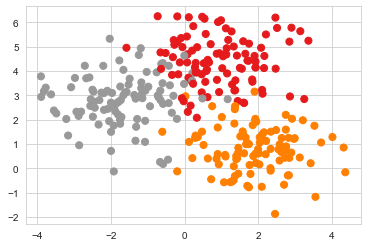

##### REG Data #####


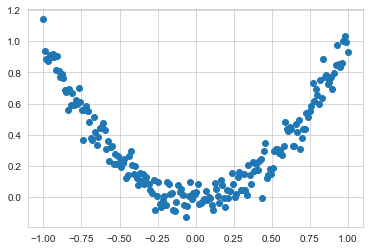

In [226]:
print("##### CLF Data #####")
X_clf, y_clf = datasets.make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=1.0)
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, s=50, cmap = 'Set1');
plt.show()
print("##### REG Data #####")
N = 200
X_reg = np.linspace(-1,1,N)
y_reg = X_reg**2+ np.random.normal(0,0.07,N)
X_reg = X_reg.reshape(-1,1)
plt.scatter(X_reg,y_reg)
plt.show()

In [227]:
# split dataset
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf,y_clf,test_size=0.3,random_state=0)
print(len(X_test_clf)/(len(X_train_clf)+len(X_test_clf)), len(y_test_clf)/(len(y_train_clf)+len(y_test_clf)) )

# split dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,test_size=0.3,random_state=0)
print(len(X_test_reg)/(len(X_train_reg)+len(X_test_reg)), len(y_test_reg)/(len(y_train_reg)+len(y_test_reg)) )


0.3 0.3
0.3 0.3


DecisionTree has a score of 0.91


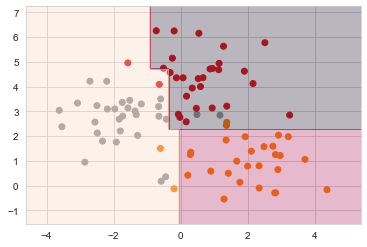

In [54]:
# Classification data Standardize
mean = X_clf.mean(axis=0)
std = X_clf.std(axis=0)
X_clf = (X_clf - mean) / std

n_trees = 100
plot_step = 0.02

models = [DecisionTreeClassifier(max_depth=3), #0
          RandomForestClassifier(n_estimators=n_trees), #1
          ExtraTreesClassifier(n_estimators=n_trees), #2
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_trees), #3
          GradientBoostingClassifier(n_estimators=n_trees), #4
          HistGradientBoostingClassifier(), #5 has no attrib for n_estimators
          XGBClassifier(n_estimators=n_trees,
                        objective='multi:softprob',
                        eval_metric=['merror','mlogloss']), #6
          LGBMClassifier(n_estimators=n_trees), #7
          CatBoostClassifier(verbose=0,n_estimators=n_trees) #8
          ]
#0 Decision Tree Classifier
DTclf=models[0]
DTclf.fit(X_train_clf, y_train_clf)
scores = DTclf.score(X_test_clf, y_test_clf)
def model_describer(model, scores):    
    model_details=str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    if hasattr(model, "estimators_"):
        model_details+=" with {} estimators".format(len(model.estimators_))
    print(model_details+f" has a score of {scores:.2f}")
    
model_describer(DTclf, scores)

fig,ax=plt.subplots(1, 1, figsize=(6,4))
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
def model_plot(model, plot_step):
    x_min, x_max = X_test_clf[:, 0].min() - 1, X_test_clf[:, 0].max() + 1
    y_min, y_max = X_test_clf[:, 1].min() - 1, X_test_clf[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # same as xx.reshape(-1)
    Z = Z.reshape(xx.shape)                          #         yy.reshape(-1)
    # cs = plt.contourf(xx, yy, Z, cmap=cmap)
    plt.scatter(X_test_clf[:,0],X_test_clf[:,1], c = y_test_clf,cmap = 'Set1')
    plt.contourf(xx,yy,Z,alpha=0.3)
    plt.show()
    
model_plot(DTclf, plot_step)


RandomForest with 100 estimators has a score of 0.89


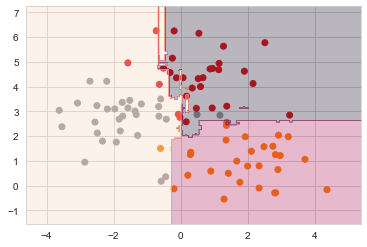

In [22]:
#1 Random Forest 
RFclf=models[1]
RFclf.fit(X_train_clf, y_train_clf)
scores = RFclf.score(X_test_clf, y_test_clf)
model_describer(RFclf, scores)

model_plot(RFclf, plot_step)


ExtraTrees with 100 estimators has a score of 0.87


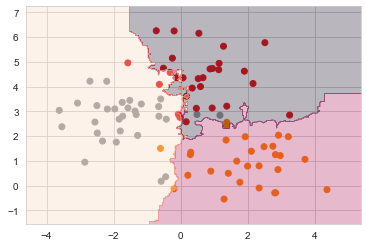

In [23]:
#2 Extra Trees Classifier
ETclf=models[2]
ETclf.fit(X_train_clf, y_train_clf)
scores = ETclf.score(X_test_clf, y_test_clf)
model_describer(ETclf, scores)

model_plot(ETclf, plot_step)

AdaBoost with 100 estimators has a score of 0.88


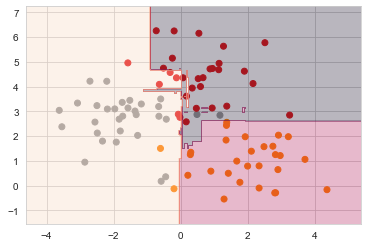

In [25]:
#3 AdaBoost Classifier
ADAclf=models[3]
ADAclf.fit(X_train_clf, y_train_clf)
scores = ADAclf.score(X_test_clf, y_test_clf)
model_describer(ADAclf, scores)

model_plot(ADAclf, plot_step)

GradientBoosting with 100 estimators has a score of 0.89


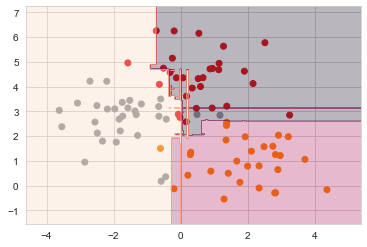

In [52]:
#4 GradientBoosting Classifier
GBclf=models[4]
GBclf.fit(X_train_clf, y_train_clf)
scores = GBclf.score(X_test_clf, y_test_clf)
model_describer(GBclf, scores)

model_plot(GBclf, plot_step)

HistGradientBoosting has a score of 0.84


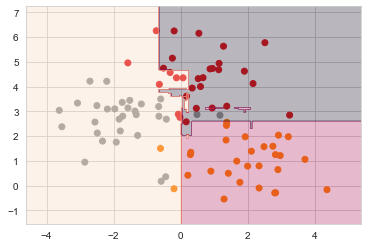

In [48]:
#5 HistGradientBoosting Classifier 
HGBclf=models[5]
HGBclf.fit(X_train_clf, y_train_clf)
scores = HGBclf.score(X_test_clf, y_test_clf)
model_describer(HGBclf, scores)

model_plot(HGBclf, plot_step)


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB has a score of 0.89


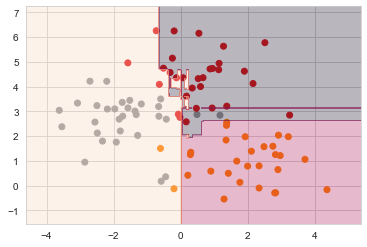

In [57]:
#6 XGBosting Classifier 
XGBclf=models[6]
XGBclf.fit(X_train_clf, y_train_clf)
scores = XGBclf.score(X_test_clf, y_test_clf)
model_describer(XGBclf, scores)

model_plot(XGBclf, plot_step)

LGBM has a score of 0.83


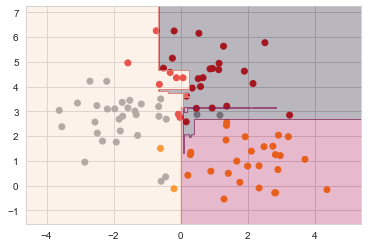

In [58]:
#7 LGBM Classifier
LGBMclf=models[7]
LGBMclf.fit(X_train_clf, y_train_clf)
scores = LGBMclf.score(X_test_clf, y_test_clf)
model_describer(LGBMclf, scores)

model_plot(LGBMclf, plot_step)

LGBM has a score of 0.83


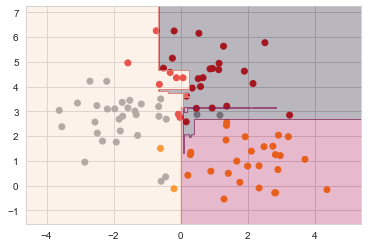

In [59]:
#8 CatBoost Classifier 
CATclf=models[7]
CATclf.fit(X_train_clf, y_train_clf)
scores = CATclf.score(X_test_clf, y_test_clf)
model_describer(CATclf, scores)

model_plot(CATclf, plot_step)

DecisionTree has a score of 0.79


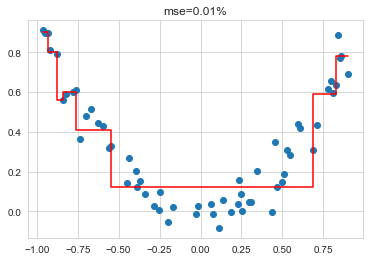

In [246]:
# Regression data Standardize
mean = X_reg.mean(axis=0)
std = X_reg.std(axis=0)
X_reg = (X_reg - mean) / std

n_trees1 = 1
n_trees2 = 100

models_reg = [DecisionTreeRegressor(max_depth=3), #0
          [RandomForestRegressor(n_estimators=n_trees1),
           RandomForestRegressor(n_estimators=n_trees2)], #1
          [ExtraTreesRegressor(n_estimators=n_trees1),
           ExtraTreesRegressor(n_estimators=n_trees2)], #2
          [AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                             n_estimators=n_trees1),
           AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                             n_estimators=n_trees2)], #3
          [GradientBoostingRegressor(n_estimators=n_trees1),
           GradientBoostingRegressor(n_estimators=n_trees2)],#4
          HistGradientBoostingRegressor(), #5 has no attrib for n_estimators
          [XGBRegressor(n_estimators=n_trees1,
                        objective='reg:squarederror'), 
           XGBRegressor(n_estimators=n_trees2,
                        objective='reg:squarederror')], #6
          [LGBMRegressor(n_estimators=n_trees1),
           LGBMRegressor(n_estimators=n_trees2)],#7
          [CatBoostRegressor(verbose=0,n_estimators=n_trees1),
           CatBoostRegressor(verbose=0,n_estimators=n_trees2)]#8
          ]
#0 Decision Tree Regressor
DTreg=models_reg[0]
DTreg.fit(X_train_reg, y_train_reg)
scores = DTreg.score(X_test_reg, y_test_reg)
def regmodel_describer(model, scores):    
    model_details=str(type(model)).split(".")[-1][:-2][:-len("Regressor")]
    if hasattr(model, "estimators_"):
        model_details+=" with {} estimators".format(len(model.estimators_))
    print(model_details+f" has a score of {scores:.2f}")
    
regmodel_describer(DTreg, scores)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
def regmodel_plot(model1, model2=None):

    if isinstance(model1, DecisionTreeRegressor) or isinstance(model1, HistGradientBoostingRegressor):
        fig,ax=plt.subplots(1, 1, figsize=(6,4))
        model1.fit(X_test_reg,y_test_reg)
        ax.scatter(X_test_reg,y_test_reg)
        x=np.array(sorted(X_test_reg))
        y=model1.predict(x)
        ax.step(x,y,'r')
        acc = metrics.mean_squared_error(y_test_reg.reshape(-1), model1.predict(X_test_reg))
        ax.set_title(f'mse={acc:.2f}%')
        plt.show()
    else:
        fig,ax=plt.subplots(1, 2, figsize=(8,4))
        i=0
        models=[model1, model2]
        
        for n_tree in [1,100]:
            models[i].fit(X_test_reg,y_test_reg)
            ax[i].scatter(X_test_reg,y_test_reg)
            x=sorted(X_test_reg)
            y=models[i].predict(x)
            ax[i].step(x,y,'r')
            acc = metrics.mean_squared_error(y_test_reg.reshape(-1), models[i].predict(X_test_reg))
            ax[i].set_title(f'n_estimator={n_tree}, mse={acc:.2f}%')
            i+=1
        plt.show()
    
regmodel_plot(DTreg)

RandomFores with 1 estimators has a score of 0.87
RandomFores with 100 estimators has a score of 0.92


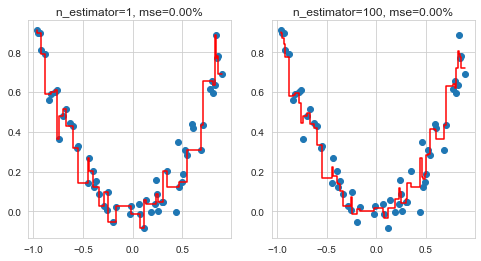

In [247]:
#1 Random Forest 
RFreg=models_reg[1]

# 1 estimator
RFreg[0].fit(X_train_reg, y_train_reg)
scores = RFreg[0].score(X_test_reg, y_test_reg)
model_describer(RFreg[0], scores)

# 100 estimators
RFreg[1].fit(X_train_reg, y_train_reg)
scores = RFreg[1].score(X_test_reg, y_test_reg)
model_describer(RFreg[1], scores)

regmodel_plot(RFreg[0], RFreg[1])

ExtraTree with 1 estimators has a score of 0.89
RandomFores with 100 estimators has a score of 0.92


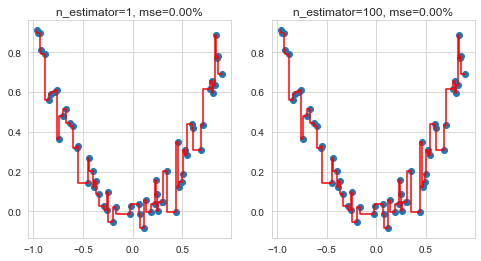

In [248]:
#2 Extra Trees Classifier
ETreg=models_reg[2]

# 1 estimator
ETreg[0].fit(X_train_reg, y_train_reg)
scores = ETreg[0].score(X_test_reg, y_test_reg)
model_describer(ETreg[0], scores)

# 100 estimators
RFreg[1].fit(X_train_reg, y_train_reg)
scores = RFreg[1].score(X_test_reg, y_test_reg)
model_describer(RFreg[1], scores)

regmodel_plot(ETreg[0],ETreg[1])

AdaBoos with 1 estimators has a score of 0.81
AdaBoos with 47 estimators has a score of 0.92


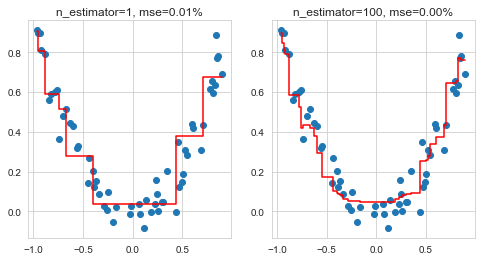

In [249]:
#3 AdaBoost Regressor
ADAreg=models_reg[3]

# 1 estimator
ADAreg[0].fit(X_train_reg, y_train_reg)
scores = ADAreg[0].score(X_test_reg, y_test_reg)
model_describer(ADAreg[0], scores)

# 100 estimators
ADAreg[1].fit(X_train_reg, y_train_reg)
scores = ADAreg[1].score(X_test_reg, y_test_reg)
model_describer(ADAreg[1], scores)

regmodel_plot(ADAreg[0],ADAreg[1])

GradientBoostin with 1 estimators has a score of 0.17
GradientBoostin with 100 estimators has a score of 0.92


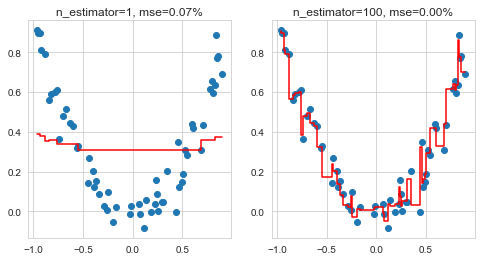

In [250]:
#4 GradientBoosting Regressor
GBreg=models_reg[4]

# 1 estimator
GBreg[0].fit(X_train_reg, y_train_reg)
scores = GBreg[0].score(X_test_reg, y_test_reg)
model_describer(GBreg[0], scores)

# 100 estimators
GBreg[1].fit(X_train_reg, y_train_reg)
scores = GBreg[1].score(X_test_reg, y_test_reg)
model_describer(GBreg[1], scores)

regmodel_plot(GBreg[0],GBreg[1])

HistGradientBoostin has a score of 0.85


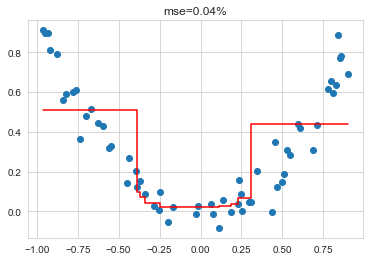

In [251]:
#5 HistGradientBoosting Regressor
HGBreg=models_reg[5]

HGBreg.fit(X_train_reg, y_train_reg)
scores = HGBreg.score(X_test_reg, y_test_reg)
model_describer(HGBreg, scores)

regmodel_plot(HGBreg)

XG has a score of 0.31
XG has a score of 0.90


Text(0.5, 1.0, 'n_estimator=1, mse=0.17%')

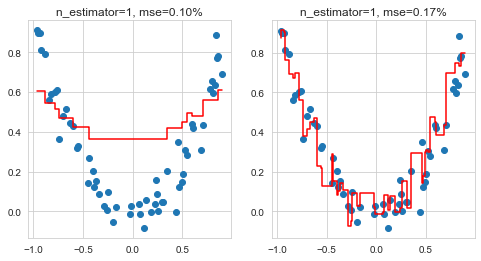

In [258]:
#6 XGBoosting Regressor 
XGBreg=models_reg[6]

# 1 estimator
XGBreg[0].fit(X_train_reg, y_train_reg)
scores = XGBreg[0].score(X_test_reg, y_test_reg)
model_describer(XGBreg[0], scores)

x1=np.array(sorted(X_test_reg))
y_pred1=XGBreg[0].predict(x1)

# 100 estimators
XGBreg[1].fit(X_train_reg, y_train_reg)
scores = XGBreg[1].score(X_test_reg, y_test_reg)
model_describer(XGBreg[1], scores)

x100=np.array(sorted(X_test_reg))
y_pred100=XGBreg[1].predict(x100)

fig,ax=plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(X_test_reg,y_test_reg)
ax[0].step(x1,y_pred1,'r')
acc = metrics.mean_squared_error(y_test_reg.reshape(-1), y_pred1)
ax[0].set_title(f'n_estimator={1}, mse={acc:.2f}%')

ax[1].scatter(X_test_reg,y_test_reg)
ax[1].step(x100,y_pred100,'r')
acc = metrics.mean_squared_error(y_test_reg.reshape(-1), y_pred100)
ax[1].set_title(f'n_estimator={1}, mse={acc:.2f}%')

LGB has a score of 0.17
LGB has a score of 0.86


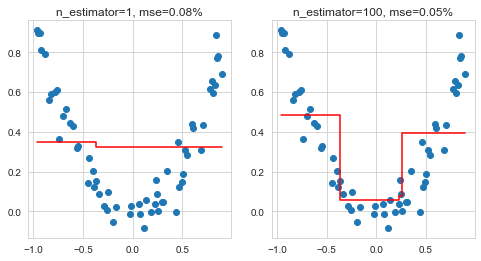

In [259]:
#7 Light GBM Regressor
LGBMreg=models_reg[7]

# 1 estimator
LGBMreg[0].fit(X_train_reg, y_train_reg)
scores = LGBMreg[0].score(X_test_reg, y_test_reg)
model_describer(LGBMreg[0], scores)

# 100 estimators
LGBMreg[1].fit(X_train_reg, y_train_reg)
scores = LGBMreg[1].score(X_test_reg, y_test_reg)
model_describer(LGBMreg[1], scores)

regmodel_plot(LGBMreg[0],LGBMreg[1])

CatBoos has a score of 0.53
CatBoos has a score of 0.93


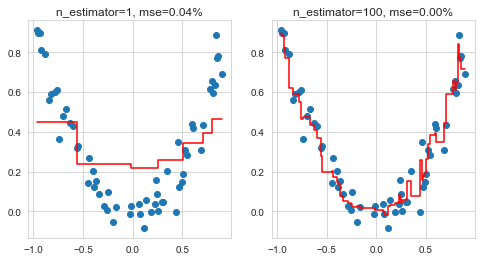

In [261]:
#8 CatBoost Regressor
CATBreg=models_reg[8]

# 1 estimator
CATBreg[0].fit(X_train_reg, y_train_reg)
scores = CATBreg[0].score(X_test_reg, y_test_reg)
model_describer(CATBreg[0], scores)

# 100 estimators
CATBreg[1].fit(X_train_reg, y_train_reg)
scores = CATBreg[1].score(X_test_reg, y_test_reg)
model_describer(CATBreg[1], scores)

regmodel_plot(CATBreg[0],CATBreg[1])

As taking a look at the plots for classification and regression tasks, it looks AdaBoost is 

In [253]:
# Create an adaboost classifier object 
# (default of Decision Tree classifier)
adaDT_clf = AdaBoostClassifier(learning_rate=0.5)

# training
adaDT_b = adaDT_clf.fit(X_train,y_train)

# predicting
y_pred = adaDT_b.predict(X_test)
predictions=[round(value) for value in y_pred]

# evaluating
print(f"Adaboost based DT\nAccuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"F1-Score: {metrics.f1_score(y_test,y_pred,average=None)}")
# micro: global calculation
print(f"F1-Score (micro): {metrics.f1_score(y_test,y_pred,average='micro'):.3f}")
# macro: unweighted mean of each label calculation
print(f"F1-Score (macro): {metrics.f1_score(y_test,y_pred,average='macro'):.3f}")
# weighted: mean weighted by support 
# (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance.
print(f"F1-Score (weighted): {metrics.f1_score(y_test,y_pred,average='weighted'):.3f}")

real_test_errors = []

for real_test_predict in adaDT_clf.staged_predict(X_test):
    real_test_errors.append(1. - metrics.accuracy_score(real_test_predict, y_test))

n_trees_real = len(adaDT_clf)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
real_estimator_errors = adaDT_b.estimator_errors_[:n_trees_real]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_real + 1), 
         real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')



# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

NameError: name 'X_train' is not defined